# FIFA World Rankings
## Part 2 - Add Country Data
___

In [19]:
# Import necessary dependencies
import re
import time
import pandas as pd
import json
from datetime import datetime, date, timedelta
import numpy as np
from datetime import datetime as dt
import validators
import seaborn as sns

### Get country flag images
Source: https://data.world/pbi/country-flag-database-from-wikipedia

In [2]:
country_flags = pd.read_excel('./data/country_flags_dataset.xlsx')
country_flags.head()

,Country,ImageURL
0,Afghanistan,https://upload.wikimedia.org/wikipedia/commons...
1,Albania,https://upload.wikimedia.org/wikipedia/commons...
2,Algeria,https://upload.wikimedia.org/wikipedia/commons...
3,Andorra,https://upload.wikimedia.org/wikipedia/commons...
4,Angola,https://upload.wikimedia.org/wikipedia/commons...


In [3]:
# Import master dataframe
master_df = pd.read_csv('./data/FIFA_World_Rankings_Extracted_20210610.csv')

# Rename countries of master dataframe
master_df.replace('USA', 'United States', inplace=True)
master_df.replace('Korea Republic', 'South Korea', inplace=True)
master_df.replace('Korea DPR', 'North Korea', inplace=True)
master_df.replace("Côte d'Ivoire", 'Ivory Coast', inplace=True)
master_df.replace('Congo DR', 'Democratic Republic of Congo', inplace=True)
master_df.replace('Congo', 'Republic of Congo', inplace=True)
master_df.replace('China PR', 'China', inplace=True)
master_df.replace('IR Iran', 'Iran', inplace=True)

In [4]:
# Merge country flag URL with master dataframe
master_df_flag = master_df.merge(country_flags, how = 'left', left_on='country', right_on='Country')

# Drop extra Country column
master_df_flag.drop(columns=['Country'], inplace=True)

# List of countries without flag image
master_df_flag[master_df_flag['ImageURL'].isnull()]['country'].unique()

array(['North Macedonia', 'Cabo Verde', 'Curaçao', 'Kyrgyz Republic',
       'Faroe Islands', 'St. Kitts and Nevis', 'Eswatini',
       'New Caledonia', 'Tahiti', 'St. Vincent and the Grenadines',
       'Bermuda', 'St. Lucia', 'Puerto Rico', 'Montserrat',
       'São Tomé and Príncipe', 'American Samoa', 'Cayman Islands',
       'Gibraltar', 'Timor-Leste', 'Guam', 'Aruba',
       'Turks and Caicos Islands', 'US Virgin Islands',
       'British Virgin Islands', 'Anguilla', 'Curacao',
       'Sao Tome e Principe', 'FYR Macedonia', 'St. Vincent / Grenadines',
       'São Tomé e Príncipe', 'Netherlands Antilles',
       'Serbia and Montenegro', 'Yugoslavia', 'Zaire', 'Czechoslovakia'],
      dtype=object)

In [5]:
master_df_flag.head()

,rank,country,points,date,ImageURL
0,1,Belgium,1783.38,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...
1,2,France,1757.30,27 May 2021,https://upload.wikimedia.org/wikipedia/en/c/c3...
2,3,Brazil,1742.65,27 May 2021,https://upload.wikimedia.org/wikipedia/en/0/05...
3,4,England,1686.78,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...
4,5,Portugal,1666.12,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...


___
### Get country population

In [16]:
country_pop = pd.read_excel('./data/country_population_2020.xlsx')
country_pop.head()

,Country,Population,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.0039,5540090.0,153.0,9388211.0,-348399.0,1.7,38,0.61,0.1847
1,India,1382345085,0.0099,13586631.0,464.0,2973190.0,-532687.0,2.2,28,0.35,0.1770
2,United States,331341050,0.0059,1937734.0,36.0,9147420.0,954806.0,1.8,38,0.83,0.0425
3,Indonesia,274021604,0.0107,2898047.0,151.0,1811570.0,-98955.0,2.3,30,0.56,0.0351
4,Pakistan,221612785,0.0200,4327022.0,287.0,770880.0,-233379.0,3.6,23,0.35,0.0283


In [17]:
master_df_flag_pop = master_df_flag.merge(country_pop, how = 'left', left_on='country', right_on='Country')

# Drop extra Country column
master_df_flag_pop.drop(columns=['Country'], inplace=True)

# List of countries without flag image
master_df_flag_pop[master_df_flag_pop['Population'].isnull()]['country'].unique()

array(['Curaçao', 'Kyrgyz Republic', 'Faroe Islands', 'Kosovo',
       'St. Kitts and Nevis', 'Chinese Taipei', 'Tahiti',
       'St. Vincent and the Grenadines', 'St. Lucia', 'Macau',
       'São Tomé and Príncipe', 'Turks and Caicos Islands',
       'US Virgin Islands', 'Curacao', 'Cape Verde Islands',
       'Sao Tome e Principe', 'FYR Macedonia', 'Swaziland',
       'St. Vincent / Grenadines', 'São Tomé e Príncipe',
       'Netherlands Antilles', 'Serbia and Montenegro', 'Yugoslavia',
       'Zaire', 'Czechoslovakia'], dtype=object)

In [18]:
# Create log population
master_df_flag_pop['population_natural_log'] = np.log(master_df_flag_pop['Population'])

In [23]:
# Work on most recent dataset
latest_date = master_df_flag_pop.iloc[0]['date']
master_df_flag_pop_latest = master_df_flag_pop[master_df_flag_pop['date'] == latest_date]

<AxesSubplot:xlabel='population_natural_log', ylabel='points'>

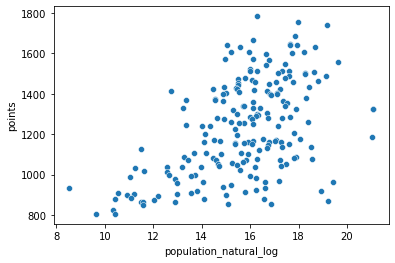

In [24]:
sns.scatterplot(data=master_df_flag_pop_latest, x="population_natural_log", y="points")

In [ ]:
# Create a new metric of points / natural log value (to see which country delivers the best out of their population)
# Also do a scatter plot based against % urban